In [ ]:
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [2]:
# En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteorologicos
# 
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones de transformación del dataframe original df_distribucion

# Analizaremos los datos de Información Estadística Climatológica del Servico Meteorológico Nacional de CONAGUA que podemos descargar del sitio:
# (https://smn.conagua.gob.mx/es/climatologia/informacion-climatologica/informacion-estadistica-climatologica) 

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/johanamirandag/Fisica-computacional/main/Actividad1/AguaPrieta26192.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_distribucion = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_trabajo0 = df_distribucion.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_trabajo1 = df_trabajo0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_trabajo1[cols] = pd.to_numeric(df_trabajo1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_trabajo2 = df_trabajo1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_trabajo2['Fecha']=pd.to_datetime(df_trabajo2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_trabajo2['Año'] = df_trabajo2['Fecha'].dt.year
df_trabajo2['Mes'] = df_trabajo2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteorologicos = df_trabajo2.copy()
df_meteorologicos.info()
print(df_meteorologicos.head())
print(df_meteorologicos.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11794 entries, 0 to 11793
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   11794 non-null  datetime64[ns]
 1   Precip  11775 non-null  float64       
 2   Evap    2374 non-null   float64       
 3   Tmax    10788 non-null  float64       
 4   Tmin    10767 non-null  float64       
 5   Año     11794 non-null  int64         
 6   Mes     11794 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 645.1+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1975-07-01     8.5   8.6  36.0  25.0  1975  Jul
1 1975-07-02     5.8   5.8  36.0  24.0  1975  Jul
2 1975-07-03     0.0   9.8  35.0  23.0  1975  Jul
3 1975-07-04     0.0  10.4  36.0  25.0  1975  Jul
4 1975-07-05     0.0   6.6  37.0  26.0  1975  Jul
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
11789 2016-04-26     0.0   NaN  25.0   7.0  2016  Apr
11790

Creamos un **Serie de Tiempo**, fijando a la variable 'Fecha' como nuevo índice del DataFrame.

In [3]:
df_meteorologicos_ts = df_meteorologicos.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteorologicos_ts = df_meteorologicos_ts.set_index('Fecha')

# Verificamos
df_meteorologicos_ts.info()
print(df_meteorologicos_ts.head())
#print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11794 entries, 1975-07-01 to 2016-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  11775 non-null  float64
 1   Evap    2374 non-null   float64
 2   Tmax    10788 non-null  float64
 3   Tmin    10767 non-null  float64
 4   Año     11794 non-null  int64  
 5   Mes     11794 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 645.0+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1975-07-01     8.5   8.6  36.0  25.0  1975  Jul
1975-07-02     5.8   5.8  36.0  24.0  1975  Jul
1975-07-03     0.0   9.8  35.0  23.0  1975  Jul
1975-07-04     0.0  10.4  36.0  25.0  1975  Jul
1975-07-05     0.0   6.6  37.0  26.0  1975  Jul


## **Actividad 1**
Explora tus datos de Precipitación los últimos años 1990- fin de datos.

*   Gráfica todo el rango de datos utilizando la función df-plot()


In [4]:
# Vamos a utilizar los últimos de datos, que corresponden al periodo 1990-2016
df_90 = df_meteorologicos_ts[(df_meteorologicos_ts['Año'] >= 1990) & (df_meteorologicos_ts['Año'] < 2017)]
df_90.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1990-01-01,0.0,NaN,NaN,NaN,1990,Jan
1990-01-02,0.0,NaN,NaN,NaN,1990,Jan
1990-01-03,0.0,NaN,NaN,NaN,1990,Jan
1990-01-04,0.0,NaN,NaN,NaN,1990,Jan
1990-01-05,0.0,NaN,NaN,NaN,1990,Jan


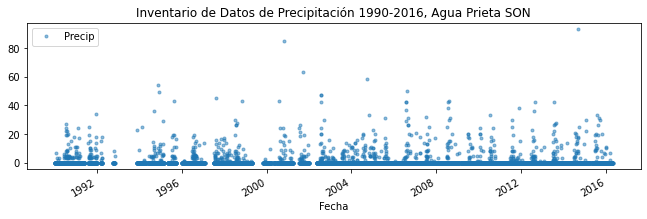

In [5]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip']
ax_ylabels = ['Precip (mm)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 3), subplots=True)
plt.title('Inventario de Datos de Precipitación 1990-2016, Agua Prieta SON');

Text(0.5, 1.0, 'Precipitación 1990-2016, Agua Prieta SON')

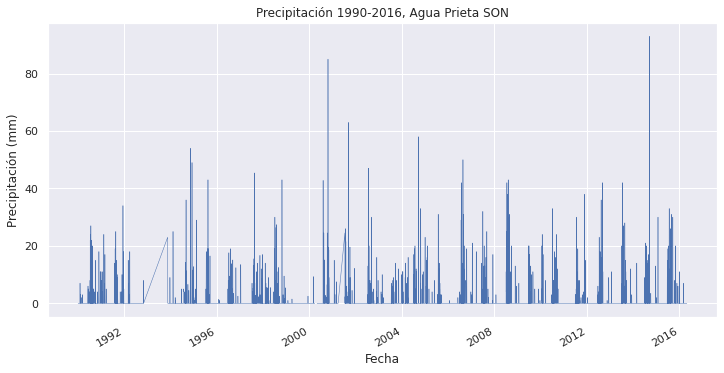

In [6]:
# Gráfica de los últimos años de precipitación
sns.set(rc={'figure.figsize':(12, 6)})
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación 1990-2016, Agua Prieta SON')

*   Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.

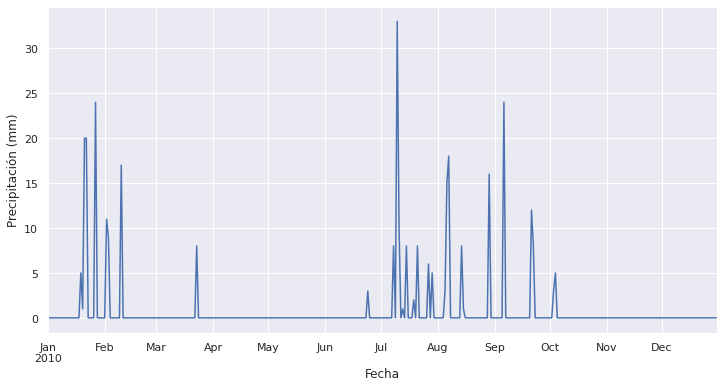

In [7]:
# Analizando la precipitación en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_90.loc['2010', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)');

*   Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

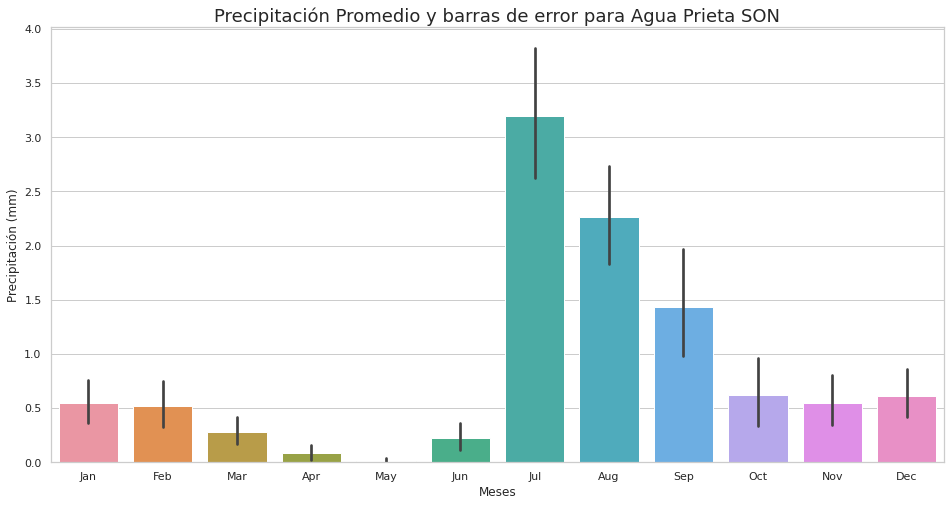

In [ ]:
# Gráfica de Precipitación últimos años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Precip', data=df_90);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Agua Prieta SON', fontsize=18)

plt.show()

## **Actividad 2**
Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 



*   Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio.  



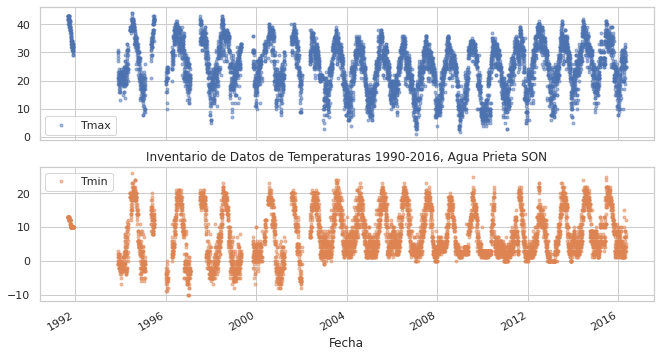

In [ ]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Tmax', 'Tmin']
ax_ylabels = ['Temperatura Máxima (°C)', 'Temperatura Mínima (°C)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 6), subplots=True)
plt.title('Inventario de Datos de Temperaturas 1990-2016, Agua Prieta SON');

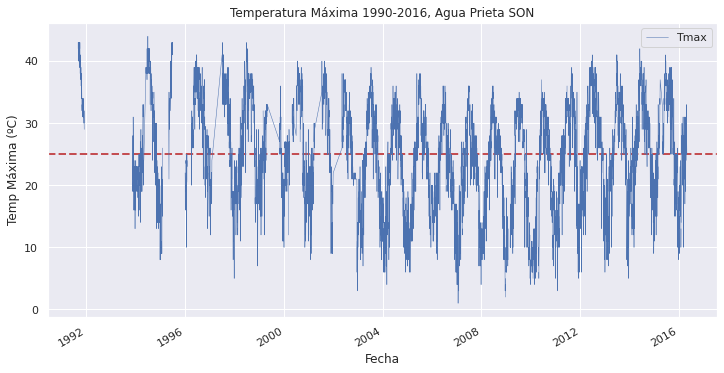

In [ ]:
# Gráfica de la temperatura máxima en los últimos años
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Tmax_ave = df_90.Tmax.mean()
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);

df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1990-2016, Agua Prieta SON')

plt.legend();

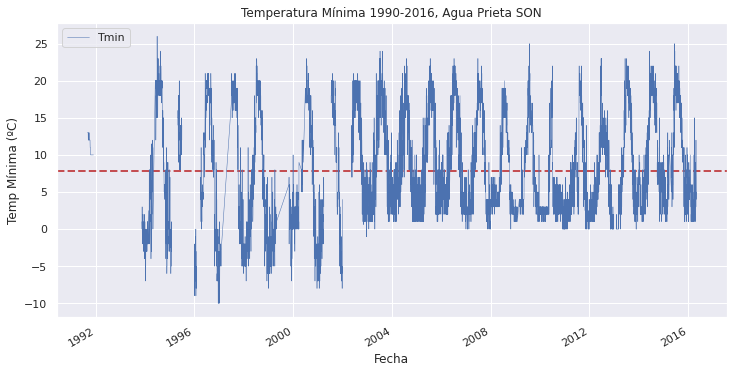

In [ ]:

# Gráfica de la temperatura mínima en los últimos años
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Tmin_ave = df_90.Tmin.mean()
plt.axhline(Tmin_ave, color = 'r', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1990-2016, Agua Prieta SON')

plt.legend();

*   Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 

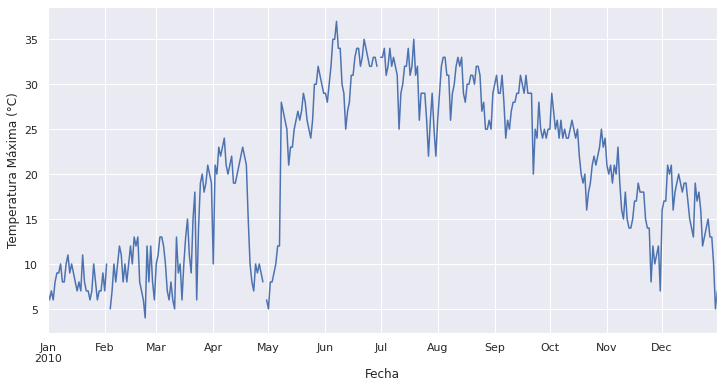

In [ ]:
# Analizando la temp máxima en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_90.loc['2010', 'Tmax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

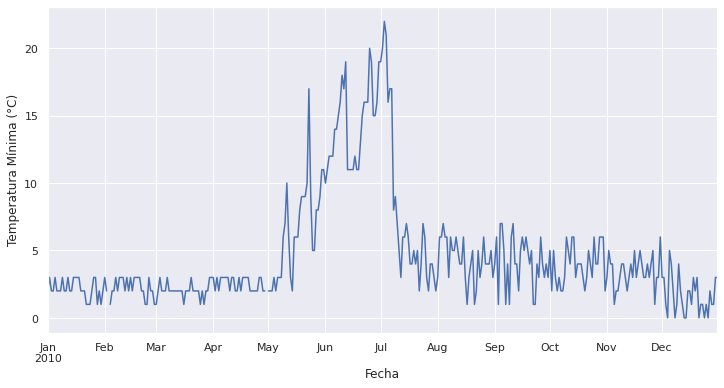

In [ ]:
# Analizando la temp mínima en el año 2010, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_90.loc['2010', 'Tmin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)');

*   Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio. 

Text(0.5, 1.0, 'Tmax')

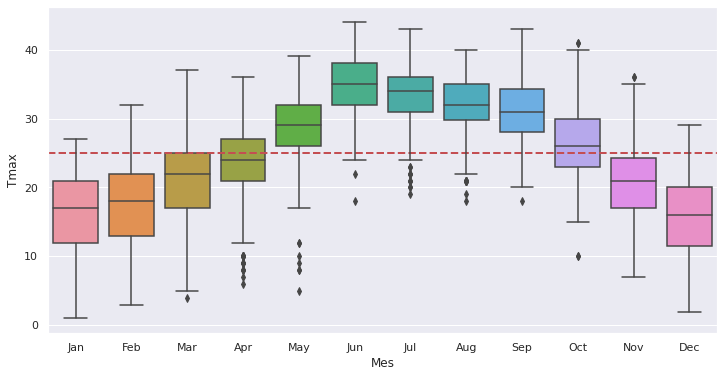

In [ ]:
# Analizando Estacionalidad de los datos de Tmax

Tmax_ave = df_90.Tmax.mean()

plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_90, x='Mes', y='Tmax')
  
  
ax.set_title('Tmax')

Text(0.5, 1.0, 'Tmin')

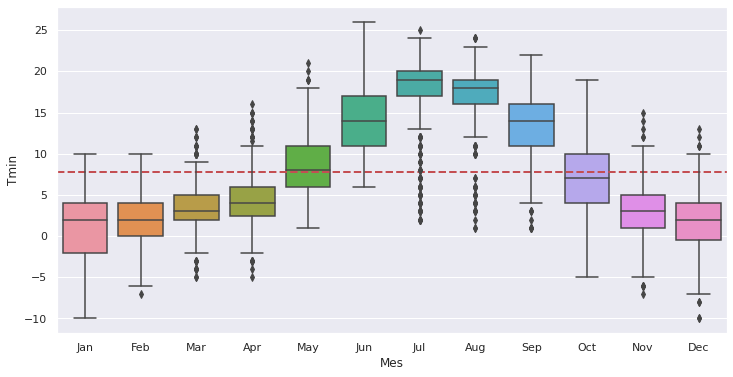

In [ ]:
# Analizando Estacionalidad de los datos de Tmin

Tmin_ave = df_90.Tmin.mean()

plt.axhline(Tmin_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_90, x='Mes', y='Tmin')
  
  
ax.set_title('Tmin')

## **Actividad 3**
Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.

*   Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. 

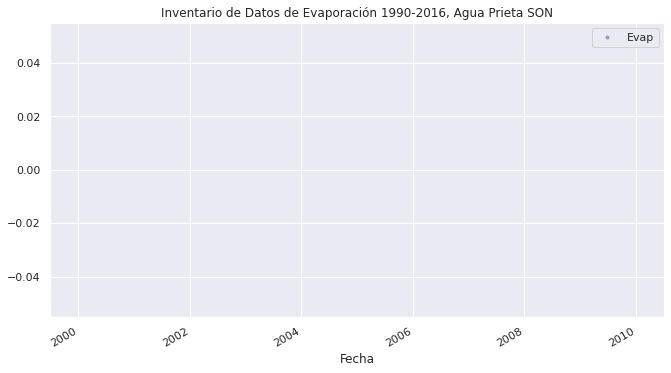

In [ ]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Evap']
ax_ylabels = ['Evaporación (mm)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 6), subplots=True)
plt.title('Inventario de Datos de Evaporación 1990-2016, Agua Prieta SON');

In [ ]:
# Dado que el conjunto de los años 1990-2016 no contiene datos de evaporación, seleccionaré otro.
df_60 = df_meteorologicos_ts[(df_meteorologicos_ts['Año'] >= 1960) & (df_meteorologicos_ts['Año'] < 1990)]

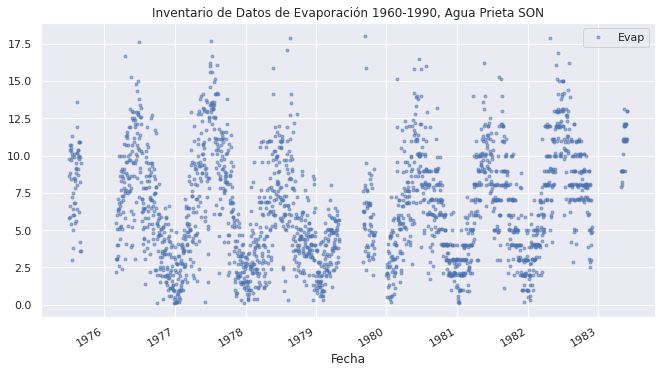

In [ ]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Evap']
ax_ylabels = ['Evaporación (mm)']
axes = df_60[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 6), subplots=True)
plt.title('Inventario de Datos de Evaporación 1960-1990, Agua Prieta SON');

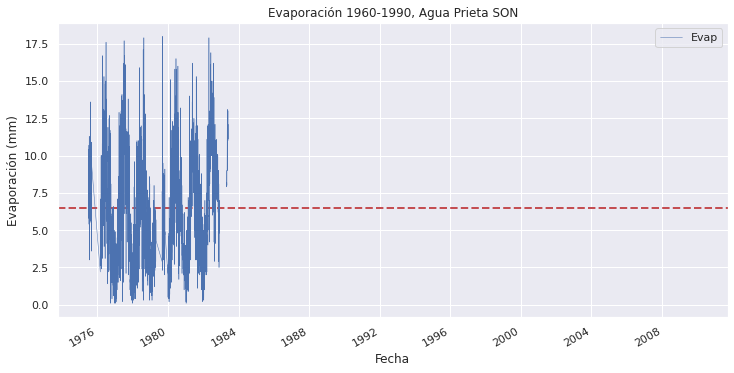

In [ ]:
# Gráfica de la temperatura máxima en los últimos años
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedio
Evap_ave = df_60.Evap.mean()
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

df_60['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
plt.title('Evaporación 1960-1990, Agua Prieta SON')

plt.legend();

*   Analiza un año específico completo con apoyo de la función df.loc() 

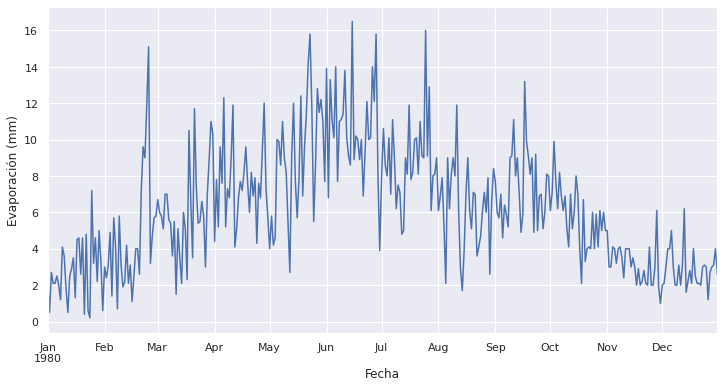

In [ ]:
# Analizando la Evaporación en el año 1980, usando la función df.loc() para filtrar un periodo
sns.set(rc={'figure.figsize':(12, 6)})
ax = df_60.loc['1980', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');

*    Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.  

Text(0.5, 1.0, 'Evap')

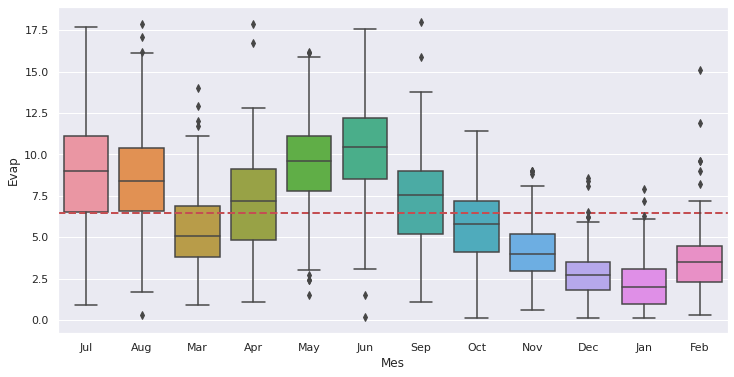

In [ ]:
# Analizando Estacionalidad de los datos de Tmax

Evap_ave = df_60.Evap.mean()

plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

sns.boxplot(data=df_60, x='Mes', y='Evap')
  
  
ax.set_title('Evap')

## **Actividad 4**
Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:

In [ ]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

*   Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días.

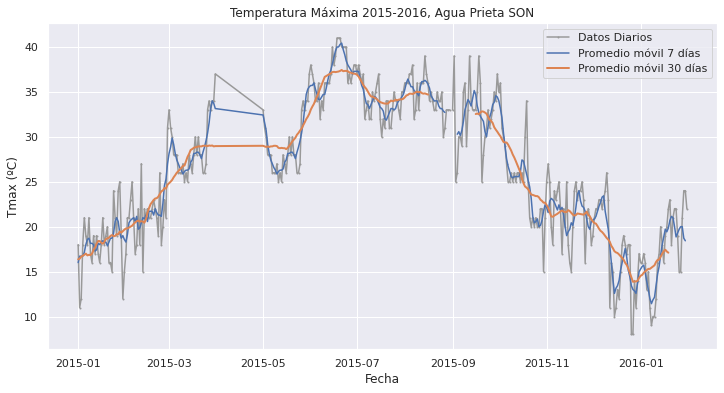

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2015-01', '2016-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7, 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2015-2016, Agua Prieta SON')
ax.legend();

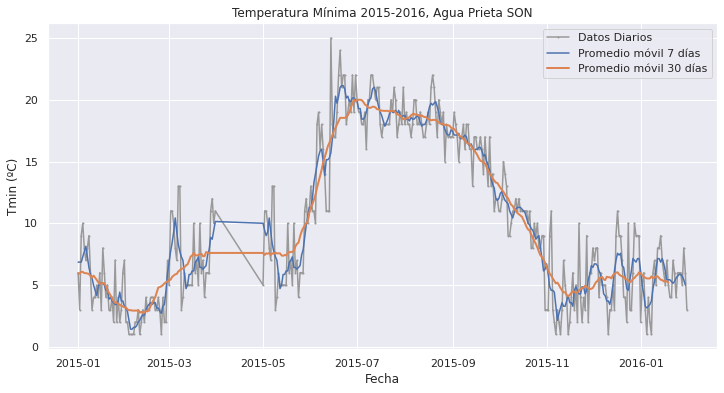

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2015-01', '2016-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7, 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2015-2016, Agua Prieta SON')
ax.legend();

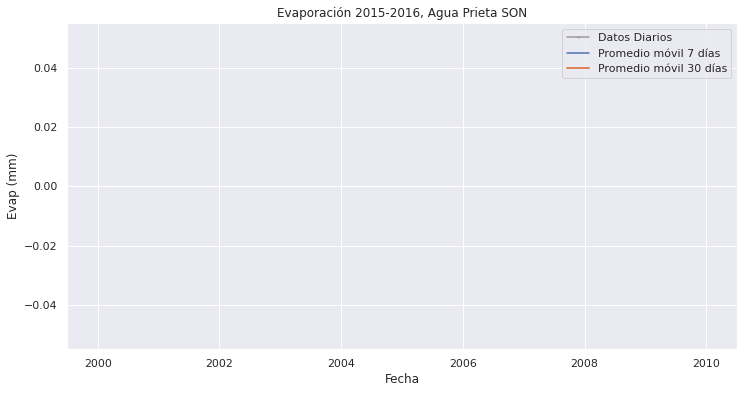

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2015-01', '2016-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 7, 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Evap'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap (mm)')
ax.set_title('Evaporación 2015-2016, Agua Prieta SON')
ax.legend();

Para la evaporación no hay datos suficientes para hacer un buen análisis en ningún año

*   Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

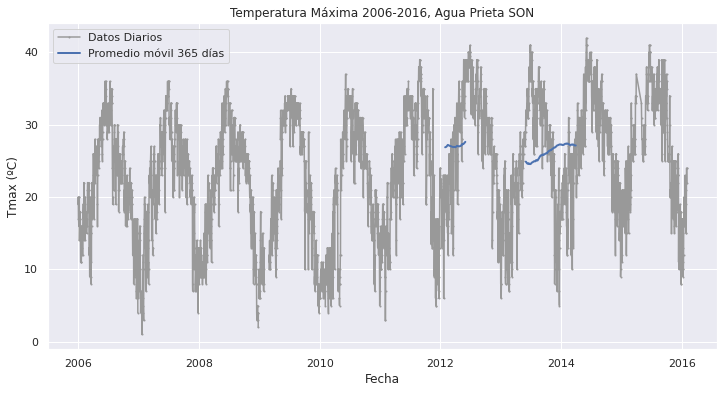

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2006-01', '2016-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2006-2016, Agua Prieta SON')
ax.legend();

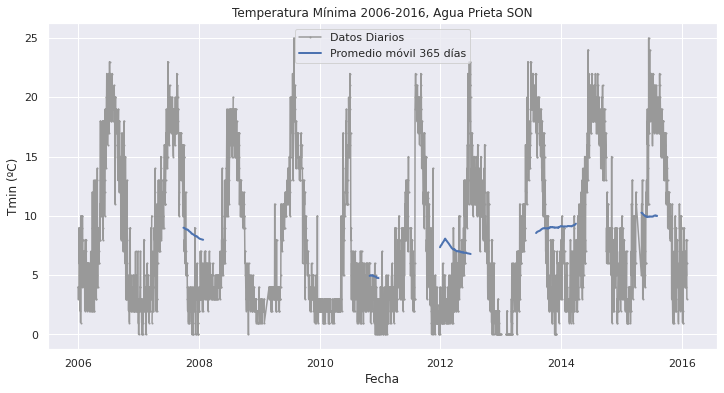

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2006-01', '2016-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2006-2016, Agua Prieta SON')
ax.legend();

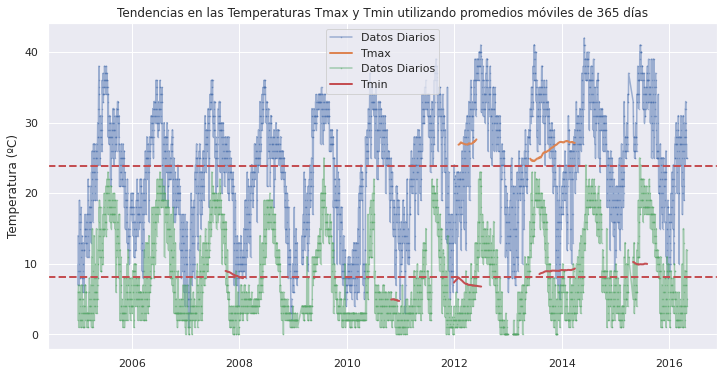

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2005-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

## **Actividad 5**

Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

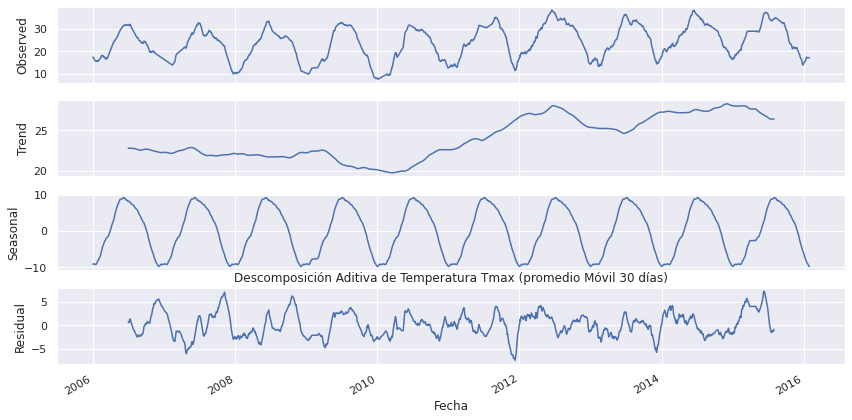

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2006-01', '2016-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

In [ ]:

resTmax.trend.describe()


count    3261.000000
mean       23.970873
std         2.587083
min        19.759087
25%        21.964886
50%        22.805936
75%        26.792329
max        28.268311
Name: Tmax, dtype: float64

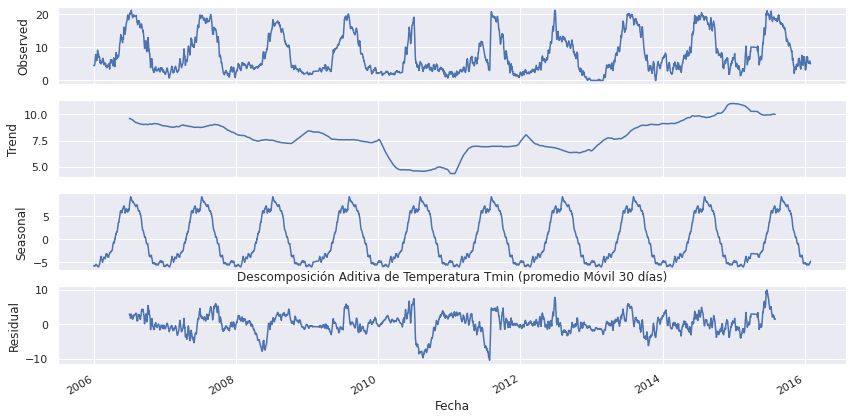

In [ ]:

# Caso: Uso de datos con promedio móvil de 7 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' 
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2006-01', '2016-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_90_7d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

In [ ]:

resTmin.trend.describe()

count    3261.000000
mean        7.812208
std         1.569455
min         4.346771
25%         6.935029
50%         7.658904
75%         8.991977
max        11.035616
Name: Tmin, dtype: float64

## **Actividad 6**
Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.  

Dado que mis datos empiezan 1975, lo mas viable es crear dos periodos de 20 años continuos.

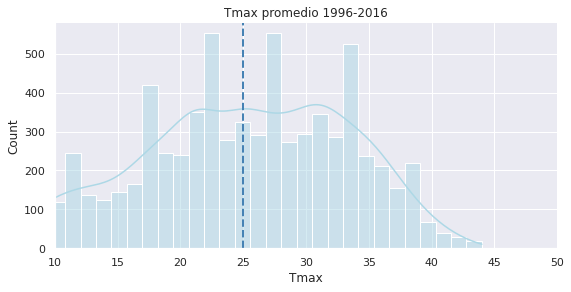

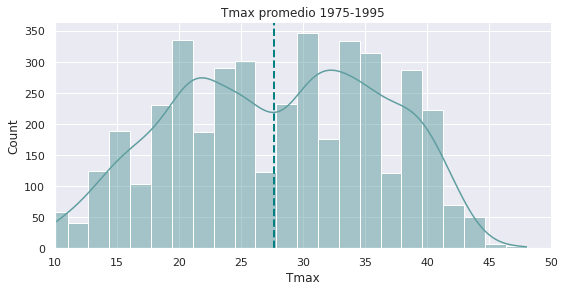

Temperatura máxima promedio del periodo 1996-2016 =  24.96024550146464 ºC
Temperatura máxima promedio del periodo 1975-1995 =  27.67734180712904 ºC


In [11]:
# Gráfica de distribuciones de Temperaturas Tmax 

df_96 = df_meteorologicos_ts[(df_meteorologicos_ts['Año'] >= 1996) & (df_meteorologicos_ts['Año'] < 2017)]
g1 = sns.displot(df_90.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

df_75 = df_meteorologicos_ts[(df_meteorologicos_ts['Año'] >= 1975) & (df_meteorologicos_ts['Año'] < 1996)]
g2 = sns.displot(df_75.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_primeros.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g1.set(title='Tmax promedio 1996-2016');
g2.set(title='Tmax promedio 1975-1995');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))


plt.show();

print('Temperatura máxima promedio del periodo 1996-2016 = ', df_90.Tmax.mean(), 'ºC' )
print('Temperatura máxima promedio del periodo 1975-1995 = ', df_primeros.Tmax.mean(), 'ºC' )